In [49]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [50]:
# Load the dataset
data = pd.read_csv('../Data File Repository/Combined_Rental_Median_Price_Inventory.csv')


In [51]:
data.head()

,Borough,2010 Total Rentals,2010 Median Rent,2011 Total Rentals,2011 Median Rent,2012 Total Rentals,2012 Median Rent,2013 Total Rentals,2013 Median Rent,2014 Total Rentals,...,2019 Total Rentals,2019 Median Rent,2020 Total Rentals,2020 Median Rent,2021 Total Rentals,2021 Median Rent,2022 Total Rentals,2022 Median Rent,2023 Total Rentals,2023 Median Rent
0,Bronx,3087,$1425.00,3674,$1210.75,5419,$1425.00,5462,$1275.00,10815,...,24007,$1829.00,17403,$1850.00,21560,$1851.00,22666,$1985.00,18069,$2191.00
1,Brooklyn,59006,$2033.50,65757,$1743.75,83105,$1900.00,136910,$2106.25,275336,...,487618,$2450.00,629297,$2475.00,580416,$2256.00,359197,$2847.50,296376,$3125.00
2,Manhattan,441207,$2847.50,395231,$3157.00,456434,$3275.00,576566,$3282.50,697721,...,675302,$3500.00,1013629,$3172.50,806908,$3267.50,506199,$4213.00,481479,$4471.50
3,Queens,19596,$1538.25,18369,$1550.00,30753,$1825.00,40171,$1743.75,89093,...,177469,$2010.75,205331,$2025.00,232639,$2004.25,146431,$2300.00,113475,$2500.00
4,Staten Island,55,0,57,0,139,$1400.00,331,$1487.50,522,...,812,$2022.50,481,$1925.00,627,$1975.00,925,$2050.00,742,$2095.00


In [52]:
# Replace 'nan' values with blanks
data = data.replace('nan', '')


In [53]:
# Define a function to calculate statistics for each borough
def calculate_stats(row):
    rents = []
    for year in range(2010, 2024):
        rent = row.get(f'{year} Median Rent', None)
        if rent is not None:
            # Check if the borough is Staten Island and the year is before 2012
            if row['Borough'] == 'Staten Island' and year < 2012:
                continue
            rents.append(float(rent.replace('$', '').replace(',', '')))
    max_rent = max(rents)
    min_rent = min(rents)
    year_max_rent = 2010 + np.argmax(rents)
    year_min_rent = 2010 + np.argmin(rents)
    median_rent = np.median(rents)
    mean_rent = np.mean(rents)
    
    # Calculate max and min inventory years for each borough
    inventory_years = [str(year) for year in range(2010, 2024)]
    max_inventory_year = max(inventory_years, key=lambda year: row.get(f'{year} Total Rentals', 0))
    min_inventory_year = min(inventory_years, key=lambda year: row.get(f'{year} Total Rentals', 0))
    
    return [max_rent, min_rent, year_max_rent, year_min_rent, median_rent, mean_rent, max_inventory_year, min_inventory_year]


In [54]:
# Create a new DataFrame with calculated statistics
boroughs = data['Borough']
borough_stats = data.apply(calculate_stats, axis=1).to_list()
borough_stats_df = pd.DataFrame(borough_stats, columns=['Max Rent', 'Min Rent', 'Year Max Rent', 'Year Min Rent', 'Median Rent', 'Mean Rent', 'Year Max Inventory', 'Year Min Inventory'])
borough_stats_df.insert(0, 'Borough', boroughs)

In [55]:
# Calculate overall statistics before formatting
overall_stats = [
    max(borough_stats_df['Max Rent']),
    min(borough_stats_df['Min Rent']),
    borough_stats_df.loc[borough_stats_df['Max Rent'].idxmax()]['Year Max Rent'],
    borough_stats_df.loc[borough_stats_df['Min Rent'].idxmin()]['Year Min Rent'],
    np.median(borough_stats_df['Median Rent']),
    np.mean(borough_stats_df['Mean Rent']),
    borough_stats_df.loc[borough_stats_df['Year Max Inventory'].idxmax()]['Year Max Inventory'],
    borough_stats_df.loc[borough_stats_df['Year Min Inventory'].idxmin()]['Year Min Inventory']
]

In [56]:
# Create a DataFrame for the overall statistics
overall_stats_df = pd.DataFrame({'Borough': ['Overall'], 'Max Rent': [overall_stats[0]], 'Min Rent': [overall_stats[1]],
                                 'Year Max Rent': [overall_stats[2]], 'Year Min Rent': [overall_stats[3]],
                                 'Median Rent': [overall_stats[4]], 'Mean Rent': [overall_stats[5]],
                                 'Year Max Inventory': [overall_stats[6]], 'Year Min Inventory': [overall_stats[7]]})


In [57]:
# Format the rent columns as currency for all entries
currency_columns = ['Max Rent', 'Min Rent', 'Median Rent', 'Mean Rent']
for column in currency_columns:
    borough_stats_df[column] = borough_stats_df[column].apply(lambda x: '${:,.2f}'.format(x) if not np.isnan(x) else '')


In [58]:
# Format the rent columns as currency for overall entries
for column in currency_columns:
    overall_stats_df[column] = '${:,.2f}'.format(overall_stats_df[column][0])


In [59]:
# Concatenate the overall statistics DataFrame with the original DataFrame
borough_stats_df = pd.concat([borough_stats_df, overall_stats_df], ignore_index=True)


In [60]:
# Replace NaN entries with a blank space
borough_stats_df = borough_stats_df.replace(np.nan, '', regex=True)


In [61]:
# Save the DataFrame to a CSV file in the specified folder
output_folder = '../Charts and Graphs Output/'
output_filename = 'borough_stats.csv'
output_path = output_folder + output_filename
borough_stats_df.to_csv(output_path, index=False)


In [63]:
# Print the DataFrame with statistics
borough_stats_df.head()

,Borough,Max Rent,Min Rent,Year Max Rent,Year Min Rent,Median Rent,Mean Rent,Year Max Inventory,Year Min Inventory
0,Bronx,"$2,191.00","$1,210.75",2023,2011,"$1,623.50","$1,630.02",2019,2010
1,Brooklyn,"$3,125.00","$1,743.75",2023,2011,"$2,300.00","$2,321.21",2020,2010
2,Manhattan,"$4,471.50","$2,847.50",2023,2010,"$3,300.25","$3,422.54",2020,2011
3,Queens,"$2,500.00","$1,538.25",2023,2010,"$1,965.25","$1,934.04",2021,2011
4,Staten Island,"$2,095.00","$1,400.00",2021,2010,"$1,923.25","$1,839.08",2016,2010


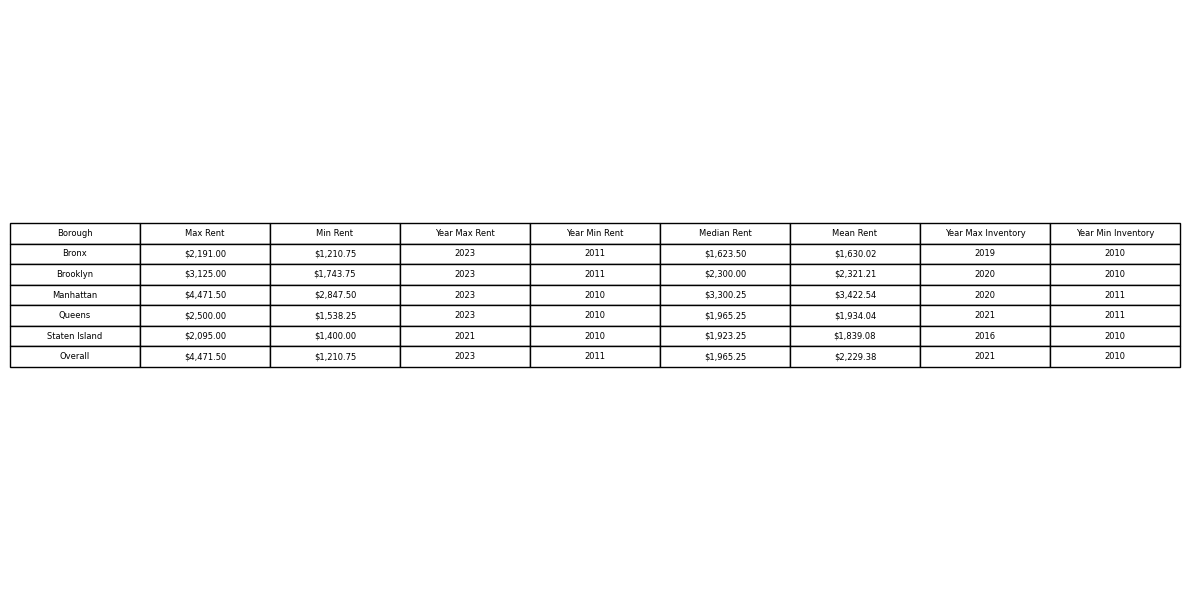

In [64]:
# Save the DataFrame as a PNG image in the same folder
plt.figure(figsize=(12, 6))
plt.axis('off')
plt.table(cellText=borough_stats_df.values,
          colLabels=borough_stats_df.columns,
          cellLoc='center', loc='center')
plt.tight_layout()
png_filename = 'borough_stats.png'
png_output_path = output_folder + png_filename
plt.savefig(png_output_path, bbox_inches='tight')
